In [1]:
import os
import json
import pandas as pd
from src.gender import gender
from src.vycisti import vycisti
pd.set_option('display.max_columns', None)
df = pd.read_json(os.path.join("data", "filmy.json"))
with open(os.path.join("data_fixes", "opravy.json"), encoding="utf-8") as opravy:
    opravy = json.loads(opravy.read())
with open(os.path.join("data_fixes", "seznamy.json"), encoding="utf-8") as seznamy:
    seznamy = json.loads(seznamy.read())
with open(os.path.join("data_fixes", "zeny.json"), encoding="utf-8") as zeny:
    zeny = json.loads(zeny.read())
with open(os.path.join("data_fixes", "nelide.json"), encoding="utf-8") as nelide:
    nelide = json.loads(nelide.read())

In [2]:
df = vycisti(df, opravy)

2023/05/26 20:57:39 z 4532 filmů odstraněno 125. Aktuální dataframe obsahuje 4407 filmů.


In [3]:
hcf = df[df["Délka"] == "dlouhometrážní"].explode("Typologie")
hcf = hcf[hcf["Typologie"] == "hraný"]

In [4]:
dve_pohlavi = ["muž","žena"]

## Herectvo

In [5]:
hcfhraji = hcf[["Film","Copyright","Režie","Scénář","Původní filmový námět","Hrají","Typologie"]]

In [6]:
def hlrole(x):
    try:
        x = x[0]
    except:
        x = x
    return x

In [7]:
hcfhraji["Hlavní role"] = hcfhraji["Hrají"].apply(lambda x: hlrole(x))

C:\Users\micha\AppData\Local\Temp\ipykernel_5564\3404391821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hcfhraji["Hlavní role"] = hcfhraji["Hrají"].apply(lambda x: hlrole(x))


In [8]:
hcfhraji["Gender hlavní role"] = hcfhraji["Hlavní role"].apply(lambda x: gender(x, zeny, nelide))

C:\Users\micha\AppData\Local\Temp\ipykernel_5564\2976082911.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hcfhraji["Gender hlavní role"] = hcfhraji["Hlavní role"].apply(lambda x: gender(x, zeny, nelide))


In [9]:
hcfhraji[["Film","Hlavní role","Gender hlavní role"]].sample(5)

,Film,Hlavní role,Gender hlavní role
3882,Maturita (398424),Michaela Doubravová,žena
741,Milan Rastislav Štefánik (395690),Zvonimir Rogoz (127538),muž
2653,Zlatí úhoři (54020),Vladimír Menšík (126036),muž
842,Panenství (395764),Lída Baarová (5202),žena
2022,Vražda po našem (396682),Květa Fialová (5338),žena


In [10]:
pomer_hl_roli = pd.Series(hcfhraji[hcfhraji["Gender hlavní role"] == "žena"].groupby("Copyright")["Hlavní role"].nunique() / hcfhraji[(hcfhraji["Gender hlavní role"] == "muž") | (hcfhraji["Gender hlavní role"] == "žena")].groupby("Copyright")["Hlavní role"].nunique())

<AxesSubplot:xlabel='Copyright'>

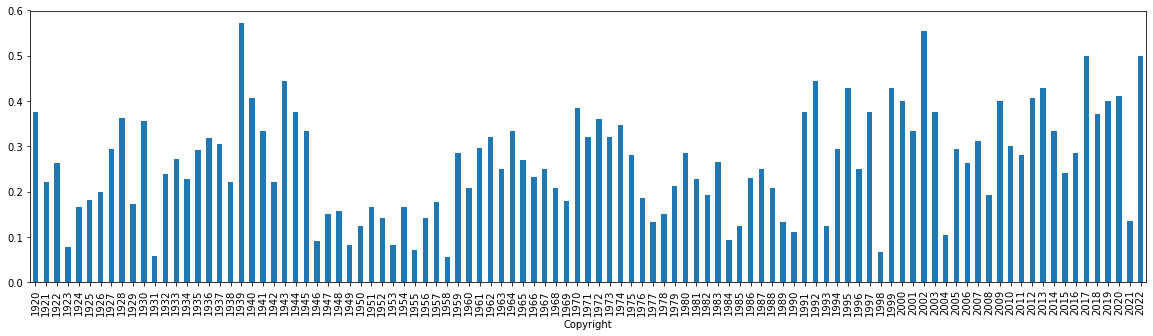

In [11]:
pomer_hl_roli.plot.bar(figsize=(20,5))

In [12]:
hcfhraji = hcfhraji.explode("Hrají")

In [13]:
hcfhraji["Gender"] = hcfhraji["Hrají"].apply(lambda x: gender(x, zeny, nelide))

In [14]:
def pomer_herecek(dataframe):
    pomer = pd.Series(dataframe[dataframe["Gender"] == "žena"].groupby("Film")["Hrají"].nunique().sum() / dataframe[(dataframe["Gender"] == "muž") | (dataframe["Gender"] == "žena")].groupby("Film")["Hrají"].nunique().sum())
    return pomer

In [15]:
herecky_celkem = pomer_herecek(hcfhraji)
herecky_celkem

0    0.302006
dtype: float64

In [16]:
herecky_7398 = pomer_herecek(hcfhraji[(hcfhraji["Copyright"]) >= 1973 & (hcfhraji["Copyright"] < 1999)])
herecky_7398

0    0.302006
dtype: float64

In [17]:
herecky_99 = pomer_herecek(hcfhraji[hcfhraji["Copyright"] >= 1999])
herecky_99

0    0.35017
dtype: float64

In [18]:
tempo = (herecky_99-herecky_7398) / 25
rok = 2010
podil = herecky_99
while float(podil) < 0.51:
    rok = rok + 1
    podil = podil + tempo
    if float(podil) > 0.49:
        print(f"{int(rok)}: {float(podil)}")

2083: 0.4908071812620393
2084: 0.49273371982516784
2085: 0.49466025838829636
2086: 0.4965867969514249
2087: 0.4985133355145534
2088: 0.500439874077682
2089: 0.5023664126408105
2090: 0.504292951203939
2091: 0.5062194897670675
2092: 0.5081460283301961
2093: 0.5100725668933246


C:\Users\micha\AppData\Local\Temp\ipykernel_5564\3207822581.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  while float(podil) < 0.51:
C:\Users\micha\AppData\Local\Temp\ipykernel_5564\3207822581.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  if float(podil) > 0.49:
C:\Users\micha\AppData\Local\Temp\ipykernel_5564\3207822581.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(f"{int(rok)}: {float(podil)}")


## Herectvo

In [19]:
herectvo = vycisti(pd.read_json(os.path.join("data", "herectvo.json")), opravy)

2023/05/26 20:57:56 z 86651 filmů odstraněno 1199. Aktuální dataframe obsahuje 85452 filmů.


In [20]:
herectvo

,Jméno,Bio,Datum narození,Místo narození,Datum úmrtí,Místo úmrtí,Titul,Film,Rok,Úloha,Role,Alternativní jména,Město narození,Stát narození,Město úmrtí,Stát úmrtí,Rok narození,Rok úmrtí,Věk
0,Jan Kašpar (10009),"JAN KAŠPAR (nar. 6.9.1952, Praha – zemřel 11. ...",06.09.1952,"Praha, Československo",11.06.2013,"Praha, Česká republika",Vratné lahve,Vratné lahve (23639),2007,Hrají,důchodce v parku,None,Praha,Československo,Česká republika,Česká republika,1952.0,2013.0,55.0
1,Jan Kašpar (10009),"JAN KAŠPAR (nar. 6.9.1952, Praha – zemřel 11. ...",06.09.1952,"Praha, Československo",11.06.2013,"Praha, Česká republika",Nejistá sezóna,Nejistá sezóna (397550),1987,Hrají,kulisák Honza Melichar,None,Praha,Československo,Česká republika,Česká republika,1952.0,2013.0,35.0
2,Jan Kašpar (10009),"JAN KAŠPAR (nar. 6.9.1952, Praha – zemřel 11. ...",06.09.1952,"Praha, Československo",11.06.2013,"Praha, Česká republika",Vesničko má středisková,Vesničko má středisková (397480),1985,Hrají,bagrista Ferda,None,Praha,Československo,Česká republika,Česká republika,1952.0,2013.0,33.0
3,Jan Kašpar (10009),"JAN KAŠPAR (nar. 6.9.1952, Praha – zemřel 11. ...",06.09.1952,"Praha, Československo",11.06.2013,"Praha, Česká republika",Rozpuštěný a vypuštěný,Rozpuštěný a vypuštěný (397438),1984,Hrají,agent Ziegler,None,Praha,Československo,Česká republika,Česká republika,1952.0,2013.0,32.0
4,Jan Kašpar (10009),"JAN KAŠPAR (nar. 6.9.1952, Praha – zemřel 11. ...",06.09.1952,"Praha, Československo",11.06.2013,"Praha, Česká republika","Jára Cimrman, ležící, spící","Jára Cimrman, ležící, spící (397423)",1983,Hrají,krajánek,None,Praha,Československo,Česká republika,Česká republika,1952.0,2013.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86646,Rostislav Novák st. (person),None,25.11.1948,"Praha, Československo",None,None,Straka v hrsti,Straka v hrsti (397595),1987,Hrají,čeledín,"Rosťa Novák, Rosťa Novák st.",Praha,Československo,None,None,1948.0,NaN,39.0
86647,Rostislav Novák st. (person),None,25.11.1948,"Praha, Československo",None,None,Rekord,Rekord (397357),1982,Hrají,chlapec,"Rosťa Novák, Rosťa Novák st.",Praha,Československo,None,None,1948.0,NaN,34.0
86648,Rostislav Novák st. (person),None,25.11.1948,"Praha, Československo",None,None,Opera ve vinici,Opera ve vinici (397330),1981,Hrají,přítel Jiří,"Rosťa Novák, Rosťa Novák st.",Praha,Československo,None,None,1948.0,NaN,33.0
86649,Rostislav Novák st. (person),None,25.11.1948,"Praha, Československo",None,None,Kalamita,Kalamita (397340),1980,Hrají,milenec,"Rosťa Novák, Rosťa Novák st.",Praha,Československo,None,None,1948.0,NaN,32.0


In [21]:
herectvo = herectvo.explode("Role")

In [22]:
herectvo[herectvo["Role"].str.lower().str.contains("princ",na=True)][["Jméno","Rok","Role","Věk"]].sort_values(by="Věk",ascending=False).head(50)

,Jméno,Rok,Role,Věk
62289,Ladislav Pešek (53326),1975,principál komediantů,69.0
48165,Marie Häusslerová (33648),1933,starší komorná princezny,67.0
58141,Martin Růžek (4934),1984,principál Fortunatus,66.0
52332,Theodor Pištěk (37366),1959,princův pobočník,64.0
41869,Ludmila Vostrčilová (27337),1978,sekretářka Šprinclová,60.0
41841,Ludmila Vostrčilová (27337),1978,sekretářka Šprinclová,60.0
26242,Antonín Bulík (130255),1938,princ Lobkovic,60.0
81923,František Kubíček (87096),1971,sluha princátka,57.0
47711,Radovan Lukavský (3301),1976,"král všech moří, otec šesti princezen",57.0
57719,Josef Kemr (4897),1978,"principál, otec Tončky",56.0


In [23]:
zanry = df[["Film","Žánr"]]

In [24]:
zanry

,Film,Žánr
0,Polední výstřel na Mariánských hradbách (401709),reportáž
1,Cvičení s kužely Sokolů malostranských (401704),"[reportáž, sportovní]"
2,Cyklisté (401705),reportáž
3,Defilování vojska o Božím těle na Královských ...,reportáž
4,Hanácké banderium (401707),reportáž
...,...,...
4527,Mimořádná událost (402176),"[komedie, satira, bláznivá komedie]"
4528,Po čem muži touží 2 (402173),"[fantastický, komedie]"
4529,Až zařve lev (402204),"[historický, životopisný, esej]"
4530,Planeta Praha (402218),"[přírodopisný, rodinný]"


In [25]:
zanry.explode("Žánr").groupby("Žánr")["Film"].nunique().nlargest(50)

Žánr
komedie              955
drama                632
psychologický        394
příběh               229
povídka              227
pohádka              216
reklamní             216
dětský               188
historický           161
melodrama            154
dokument             129
kriminální           117
etuda                110
hudební              106
životopisný          106
satira                92
dobrodružný           85
groteska              77
hořká komedie         76
povídkový             76
osvětový              70
reportáž              69
rodinný               68
politický             67
detektivní            66
sociální              65
tragikomedie          58
umělecký              57
válečný               49
fantastický           44
medailon              43
smutná komedie        42
poetický              41
thriller              41
časosběrný            41
podobenství           40
esej                  39
propagační            39
sci-fi                39
road movie          

In [26]:
pohadky = ["pohádka","dětský","rodinný"]

In [27]:
herectvo = herectvo.merge(zanry, on="Film")

In [28]:
herectvo = herectvo.explode("Žánr")

In [29]:
herectvo[(herectvo["Role"].str.lower().str.contains("důchodce",na=True,regex=True))].groupby(["Jméno","Film","Role"])["Věk"].max().nsmallest(20)

Jméno                        Film                                 Role                                           
Lubomír Kostelka (841)       Přehlídce velím já! (396823)         invalidní důchodce Josef Rendl                     42.0
Josef Vinklář (4983)         Jakou barvu má láska (396997)        hlas důchodce Máchy                                43.0
Luděk Pilc (128781)          Nikdo se nebude smát (396650)        elegantní důchodce                                 43.0
Josef Somr (1054)            Evžen mezi námi (397316)             důchodce Koutný                                    47.0
Martin Finger (19835)        Zahradnictví: Nápadník (401672)      invalidní důchodce Jindřich Rohn, Vilmin manžel    47.0
Ondřej Malý (59148)          Učitelka (400766)                    invalidní důchodce Řehák                           50.0
Josef Koza (126437)          Zlá noc (396978)                     důchodce Kverka, výpomocný zámečník                52.0
Josef Burda (78901)          Jak

In [30]:
princove = pd.DataFrame(herectvo[(herectvo["Role"].str.lower().str.contains("princ[^\w]",na=True,regex=True)) & herectvo["Žánr"].isin(pohadky)].groupby(["Jméno","Film","Role"])["Věk"].max())
princove.sort_values(by="Věk",ascending=False)

,,,Věk
Jméno,Film,Role,
Jiří Maryško (81150),Tajemství staré bambitky 2 (402174),"princ Oleandr, nápadník",41.0
Petr Hanuš (3548),Třetí princ (397364),princ na koni,39.0
Vladimír Zoubek (125641),O medvědu Ondřejovi (396371),princ Vítek,39.0
Miroslav Kalný (131466),O medvědu Ondřejovi (396371),princ nápadník,37.0
Soběslav Sejk (9018),O medvědu Ondřejovi (396371),princ Hynek,37.0
Václav Neužil (9101),Sedmero krkavců (400594),princ Norbert,36.0
Miroslav Horníček (13266),Byl jednou jeden král... (396193),"princ krásný, syn Alabastra XVI.",36.0
Jiří Bartoška (827),Třetí princ (397364),princ Jindřich,35.0
Ondřej Vetchý (836),Kouzelný měšec (8531),princ Velemír,34.0


In [31]:
herectvo[(herectvo["Role"].str.lower().str.contains("princ[^\w]",na=True,regex=True)) & herectvo["Žánr"].isin(pohadky)].groupby(["Jméno","Film","Role"])["Věk"].max().median()

29.0

In [32]:
herectvo[(herectvo["Role"].str.lower().str.contains("princ[^\w]",na=True,regex=True)) & herectvo["Žánr"].isin(pohadky)].groupby(["Jméno","Film","Role"])["Věk"].max().mean()

28.65

In [33]:
princezny = pd.DataFrame(herectvo[(herectvo["Role"].str.lower().str.contains("princezna",na=True,regex=True)) & herectvo["Žánr"].isin(pohadky)].groupby(["Jméno","Film","Role"])["Věk"].max().nlargest(20))
princezny

,,,Věk
Jméno,Film,Role,
Jitka Ježková (5336),"O princezně, která se nesmála (179679)",princezna,33.0
Stella Májová (67287),Byl jednou jeden král... (396193),princezna Zpěvanka,31.0
Jorga Kotrbová (125595),Honza málem králem (397135),princezna,30.0
Květa Fialová (5338),Princezna se zlatou hvězdou (396365),princezna Florindella,30.0
Irena Kačírková (81377),Byl jednou jeden král... (396193),princezna Drahomíra,29.0
Libuše Šafránková (2272),Třetí princ (397364),princezna Milena/princezna ze skal,29.0
Sabina Laurinová (3857),Z pekla štěstí 2 (1201),princezna Eufrozína,29.0
Vlasta Fialová (5062),Legenda o lásce (396257),princezna Mechmene Banu,28.0
Sabina Laurinová (3857),Z pekla štěstí (53139),princezna Eufrozína,27.0


In [34]:
len(princove[princove["Věk"] > princezny["Věk"].max()])

9

In [35]:
herectvo[(herectvo["Role"].str.lower().str.contains("princezna",na=True,regex=True)) & herectvo["Žánr"].isin(pohadky)].groupby(["Jméno","Film","Role"])["Věk"].max().median()

22.5

In [36]:
herectvo[(herectvo["Role"].str.lower().str.contains("princezna",na=True,regex=True)) & herectvo["Žánr"].isin(pohadky)].groupby(["Jméno","Film","Role"])["Věk"].max().mean()

22.65

In [37]:
herectvo.groupby("Jméno")["Věk"].max().nlargest()

Jméno
Jaroslav Hilbert (63466)      108.0
František Kovářík (126912)    104.0
Zdeněk Procházka (127279)     100.0
Zita Kabátová (839)            96.0
Miroslav Mráz (125568)         95.0
Name: Věk, dtype: float64

In [38]:
herectvo["Gender"] = herectvo["Jméno"].apply(lambda x: gender(x, zeny, nelide))

In [39]:
vyplneno = pd.Series(herectvo.groupby("Jméno")["Rok narození"].first(), name="vyplneno")
print(vyplneno[~vyplneno.isnull()].index.nunique())
print((vyplneno[vyplneno.isnull()].index.nunique()))

6234
5383


In [40]:
distribuce = pd.DataFrame(herectvo.groupby(["Film","Rok","Jméno","Věk","Gender"])["Rok úmrtí"].first().reset_index())

In [41]:
distribuce[distribuce["Rok úmrtí"].isnull()]

,Film,Rok,Jméno,Věk,Gender,Rok úmrtí
0,"...A bílá bledla, až celkem ztmavla (397394)",1983,Dagmar Čárová (12058),25.0,žena,NaN
1,"...A bílá bledla, až celkem ztmavla (397394)",1983,Jiří Schwarz (1346),24.0,muž,NaN
3,"...A bílá bledla, až celkem ztmavla (397394)",1983,Lucie Žulová (58489),31.0,žena,NaN
4,"...A bílá bledla, až celkem ztmavla (397394)",1983,Marta Malá (129700),30.0,žena,NaN
5,"...A bílá bledla, až celkem ztmavla (397394)",1983,Martin Kubala (714),25.0,muž,NaN
...,...,...,...,...,...,...
65150,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Karel Vítek (126651),34.0,muž,NaN
65151,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Kateřina Frýbová (88894),21.0,žena,NaN
65152,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Ladislav Mrnka (126577),47.0,muž,NaN
65159,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Nora Krčmářová (128785),45.0,žena,NaN


In [42]:
distribuce

,Film,Rok,Jméno,Věk,Gender,Rok úmrtí
0,"...A bílá bledla, až celkem ztmavla (397394)",1983,Dagmar Čárová (12058),25.0,žena,NaN
1,"...A bílá bledla, až celkem ztmavla (397394)",1983,Jiří Schwarz (1346),24.0,muž,NaN
2,"...A bílá bledla, až celkem ztmavla (397394)",1983,Karel Hovorka (76534),59.0,muž,1988.0
3,"...A bílá bledla, až celkem ztmavla (397394)",1983,Lucie Žulová (58489),31.0,žena,NaN
4,"...A bílá bledla, až celkem ztmavla (397394)",1983,Marta Malá (129700),30.0,žena,NaN
...,...,...,...,...,...,...
65168,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Vlastimil Hašek (35693),42.0,muž,1992.0
65169,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Zdeněk Blažek (126904),48.0,muž,1984.0
65170,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Zdeněk Kryzánek (81388),50.0,muž,1975.0
65171,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Zdeněk Srstka (7960),35.0,muž,2019.0


In [43]:
distribuce = distribuce[(distribuce["Rok úmrtí"] >= (distribuce["Rok"] + 2)) | (distribuce["Rok úmrtí"].isnull())]

In [44]:
distribuce

,Film,Rok,Jméno,Věk,Gender,Rok úmrtí
0,"...A bílá bledla, až celkem ztmavla (397394)",1983,Dagmar Čárová (12058),25.0,žena,NaN
1,"...A bílá bledla, až celkem ztmavla (397394)",1983,Jiří Schwarz (1346),24.0,muž,NaN
2,"...A bílá bledla, až celkem ztmavla (397394)",1983,Karel Hovorka (76534),59.0,muž,1988.0
3,"...A bílá bledla, až celkem ztmavla (397394)",1983,Lucie Žulová (58489),31.0,žena,NaN
4,"...A bílá bledla, až celkem ztmavla (397394)",1983,Marta Malá (129700),30.0,žena,NaN
...,...,...,...,...,...,...
65168,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Vlastimil Hašek (35693),42.0,muž,1992.0
65169,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Zdeněk Blažek (126904),48.0,muž,1984.0
65170,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Zdeněk Kryzánek (81388),50.0,muž,1975.0
65171,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Zdeněk Srstka (7960),35.0,muž,2019.0


In [45]:
distribuce[distribuce["Film"] == "Vlastníci (402008)"]

,Film,Rok,Jméno,Věk,Gender,Rok úmrtí
55232,Vlastníci (402008),2019,Andrej Polák (10913),40.0,muž,NaN
55233,Vlastníci (402008),2019,Dagmar Havlová (76136),68.0,žena,NaN
55234,Vlastníci (402008),2019,David Novotný (1834),50.0,muž,NaN
55235,Vlastníci (402008),2019,Halka Třešňáková (24197),47.0,žena,NaN
55236,Vlastníci (402008),2019,Jiří Lábus (838),69.0,muž,NaN
55237,Vlastníci (402008),2019,Jiří Černý (13756),37.0,muž,NaN
55238,Vlastníci (402008),2019,Klára Melíšková (13764),48.0,žena,NaN
55239,Vlastníci (402008),2019,Kryštof Hádek (1830),37.0,muž,NaN
55240,Vlastníci (402008),2019,Ladislav Trojan (10040),87.0,muž,2022.0
55241,Vlastníci (402008),2019,Ondřej Malý (59148),53.0,muž,NaN


In [46]:
distribuce.groupby("Film")["Věk"].mean().nlargest(10)

Film
Pomalu, ale slábnu (78814)                      86.500000
Panenství Lídy Baarové (400756)                 83.000000
Rosa & Dara: Co je to gravitace? (400674)       81.000000
Rosa & Dara: Jak velké jsou hvězdy? (400676)    81.000000
Rosa & Dara: Proč prší? (400672)                81.000000
Kouzelná skříň (397535)                         73.000000
Pamětnice (123955)                              72.266667
Pátá loď (401180)                               72.000000
Odborný dohled nad výkladem snu (401766)        71.750000
Až zařve lev (402204)                           70.333333
Name: Věk, dtype: float64

In [47]:
distribuce.groupby("Film")["Věk"].mean().nsmallest(10)

Film
Červená Karkulka (402180)               5.0
Potkal jsem ho v zoo (397759)          11.0
Psí historie (117009)                  11.5
Malý sen (396231)                      13.0
Cesta do pravěku (396218)              14.4
Československý Ježíšek (395161)        15.0
Černý démant (398743)                  15.4
Jak Vašíček přišel k nohám (395247)    17.0
Kino (396465)                          17.0
Očima fotografky (400647)              17.0
Name: Věk, dtype: float64

<AxesSubplot:ylabel='Frequency'>

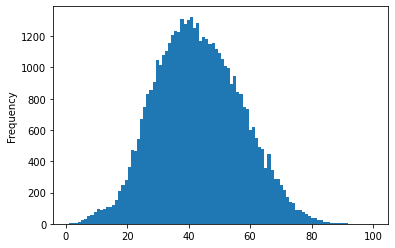

In [48]:
distribuce[distribuce["Gender"] == "muž"]["Věk"].plot.hist(bins=98)

<AxesSubplot:ylabel='Frequency'>

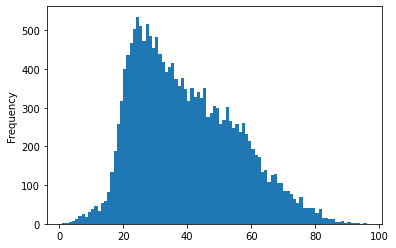

In [49]:
distribuce[distribuce["Gender"] == "žena"]["Věk"].plot.hist(bins=95)

In [50]:
distribuce[distribuce["Gender"] == "muž"]["Věk"].median()

43.0

In [51]:
distribuce[distribuce["Gender"] == "žena"]["Věk"].median()

36.0

In [52]:
distribuce[distribuce["Gender"] == "muž"]["Věk"].mode()

0    41.0
Name: Věk, dtype: float64

In [53]:
distribuce[distribuce["Gender"] == "žena"]["Věk"].mode()

0    24.0
Name: Věk, dtype: float64

In [54]:
distribuce[(distribuce["Rok"] >= 2003) & (distribuce["Gender"] == "muž")]["Věk"].median()

46.0

In [55]:
distribuce[(distribuce["Rok"] >= 2003) & (distribuce["Gender"] == "žena")]["Věk"].median()

42.0

<AxesSubplot:ylabel='Frequency'>

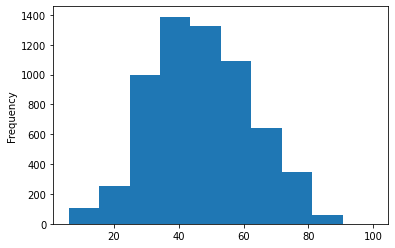

In [56]:
distribuce[(distribuce["Rok"] >= 1998) & (distribuce["Gender"] == "muž")]["Věk"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

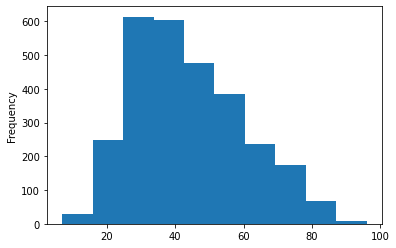

In [57]:
distribuce[(distribuce["Rok"] >= 1998) & (distribuce["Gender"] == "žena")]["Věk"].plot.hist()

## Režisérstvo

In [58]:
reziserstvo = df[["Copyright","Typologie","Délka","Žánr","Film","Režie"]]

In [59]:
reziserstvo = reziserstvo.explode("Režie").explode("Typologie").explode("Délka")

In [60]:
reziserstvo["Gender"] = reziserstvo["Režie"].apply(lambda x: gender (x, zeny, nelide))

In [61]:
reziserstvo[(reziserstvo["Gender"] == "žena") & (reziserstvo["Copyright"] >= 2003)]

,Copyright,Typologie,Délka,Žánr,Film,Režie,Gender
3475,2003,dokumentární,dlouhometrážní,dokument,Ničeho nelituji (26300),Theodora Remundová (5425),žena
3475,2003,distribuční,dlouhometrážní,dokument,Ničeho nelituji (26300),Theodora Remundová (5425),žena
3476,2003,hraný,dlouhometrážní,psychologický,Nevěrné hry (20323),Michaela Pavlátová (6866),žena
3476,2003,distribuční,dlouhometrážní,psychologický,Nevěrné hry (20323),Michaela Pavlátová (6866),žena
3480,2003,animovaný,krátkometrážní,komedie,Čapí film (25375),Denisa Grimmová (9607),žena
...,...,...,...,...,...,...,...
4515,2021,distribuční,dlouhometrážní,"[dobrodružný, rodinný]",Myši patří do nebe (402168),Alice Hurychová (81624),žena
4523,2021,hraný,dlouhometrážní,"[komedie, parodie, bláznivá komedie]",Mstitel (402140),Lucia Gažiová (19838),žena
4523,2021,distribuční,dlouhometrážní,"[komedie, parodie, bláznivá komedie]",Mstitel (402140),Lucia Gažiová (19838),žena
4531,2022,dokumentární,dlouhometrážní,medailon,Identita ES (402166),Alena Činčerová (5732),žena


In [62]:
reziserstvo[(reziserstvo["Gender"] == "žena")]["Film"].nunique() / reziserstvo["Film"].nunique()

0.10347174948944861

In [63]:
reziserstvo[(reziserstvo["Gender"] == "žena") & (reziserstvo["Typologie"] == "hraný")]["Film"].nunique() / reziserstvo[(reziserstvo["Typologie"] == "hraný")]["Film"].nunique()

0.057457922228670924

In [64]:
reziserstvo[(reziserstvo["Gender"] == "žena") & (reziserstvo["Copyright"] >= 2003)]["Film"].nunique() / reziserstvo[(reziserstvo["Copyright"] >= 2003)]["Film"].nunique()

0.24777006937561943

In [65]:
reziserstvo[(reziserstvo["Gender"] == "žena") & (reziserstvo["Typologie"] == "hraný") & (reziserstvo["Copyright"] >= 2003)]["Film"].nunique() / reziserstvo[(reziserstvo["Copyright"] >= 2003) & (reziserstvo["Typologie"] == "hraný")]["Film"].nunique()

0.15917602996254682

<AxesSubplot:xlabel='Copyright'>

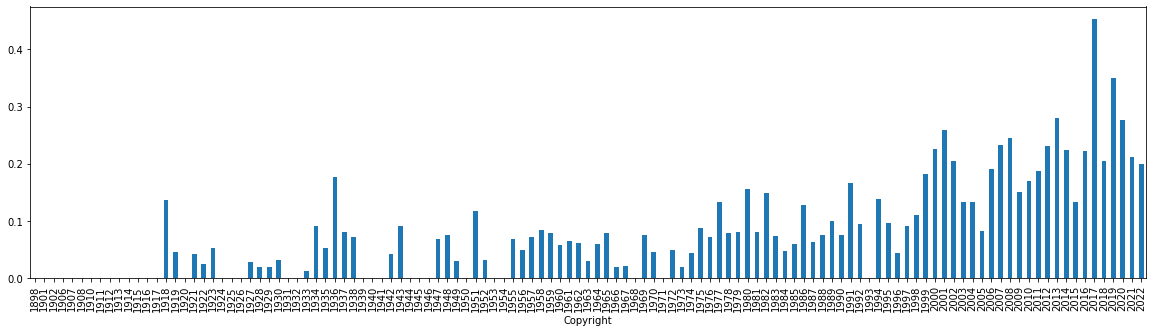

In [66]:
pomer_reziserek = pd.Series(reziserstvo[reziserstvo["Gender"] == "žena"].groupby(["Copyright","Režie"])["Film"].nunique().groupby("Copyright").sum() / reziserstvo.groupby(["Copyright","Režie"])["Film"].nunique().groupby("Copyright").sum())
pomer_reziserek.plot.bar(figsize = (20,5))

<AxesSubplot:xlabel='Copyright'>

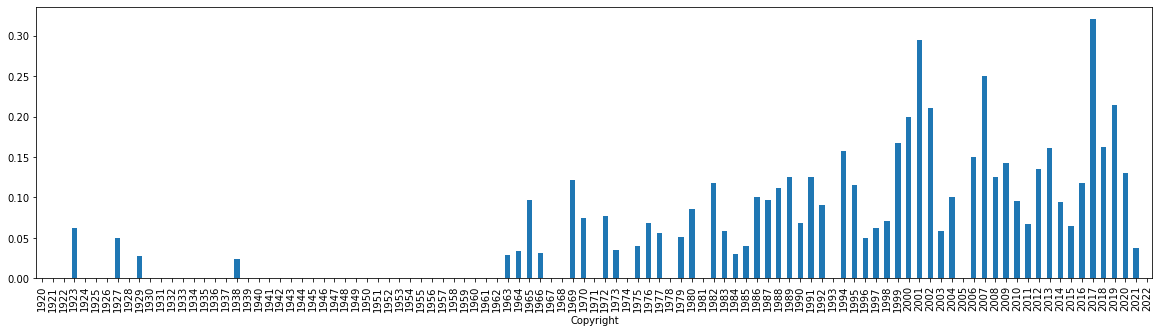

In [67]:
pomer_reziserek = pd.Series(reziserstvo[(reziserstvo["Gender"] == "žena") & (reziserstvo["Typologie"] == "hraný") & (reziserstvo["Délka"] == "dlouhometrážní")].groupby(["Copyright","Režie"])["Film"].nunique().groupby("Copyright").sum() / reziserstvo[(reziserstvo["Typologie"] == "hraný") & (reziserstvo["Délka"] == "dlouhometrážní")].groupby(["Copyright","Režie"])["Film"].nunique().groupby("Copyright").sum())
pomer_reziserek.plot.bar(figsize = (20,5))

In [68]:
reziserstvo[reziserstvo["Gender"] == "žena"].groupby("Režie")[["Copyright","Film","Typologie"]].min().sort_values(by="Copyright")

,Copyright,Film,Typologie
Režie,,,
Hedvika Raabeová (124236),1918,Praha roku 1549 (395171),distribuční
Olga Rautenkranzová (80115),1918,Kozlonoh (395165),distribuční
Thea Červenková (73006),1919,Babička (395236),distribuční
Květoslava Semonická (128168),1927,Ve spárech upíra (395423),distribuční
Hermína Týrlová (4754),1928,Co jim schází? (398629),animovaný
...,...,...,...
Martina Netíková,2020,FAMU v kině 01 (402101),animovaný
Mária Pinčíková (122068),2021,Na značky! (402115),distribuční
Adéla Špaljová (3107),2021,Nebe (402085),distribuční


In [69]:
typy = reziserstvo["Typologie"].drop_duplicates().to_list()

In [70]:
for t in typy:
    try:
        mu = reziserstvo[(reziserstvo["Copyright"] >= 1998) & (reziserstvo["Typologie"] == t)].groupby("Gender")["Film"].nunique().iloc[0]
        ze = reziserstvo[(reziserstvo["Copyright"] >= 1998) & (reziserstvo["Typologie"] == t)].groupby("Gender")["Film"].nunique().iloc[1]
        print(f"""{t}: {ze/(ze+mu)}, m: {mu}, ž: {ze}""")
    except:
        print(f"""{t}: m: {mu}, ž: {ze}""")

dokumentární: 0.32707774798927614, m: 251, ž: 122
distribuční: 0.23886986301369864, m: 889, ž: 279
hraný: 0.15658914728682172, m: 544, ž: 101
animovaný: 0.37341772151898733, m: 99, ž: 59
studentský: 0.47692307692307695, m: 68, ž: 62
nedistribuční: m: 4, ž: 62
středometrážní: m: 4, ž: 62
krátkometrážní: 0.4, m: 6, ž: 4


<AxesSubplot:xlabel='Copyright'>

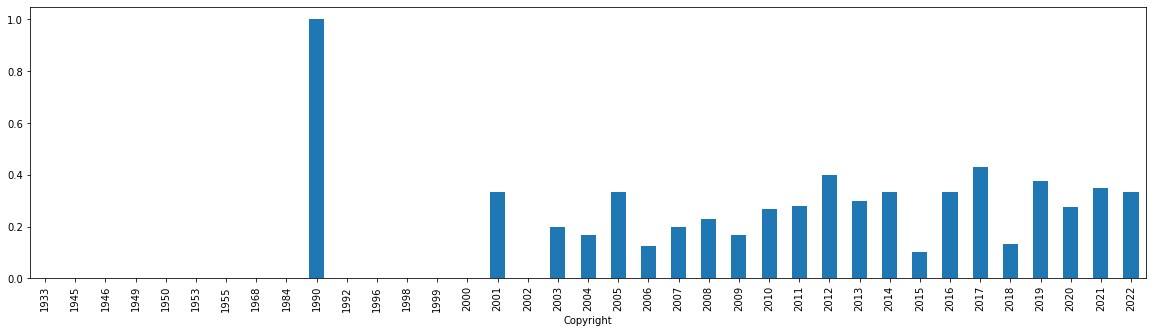

In [71]:
pomer_reziserek = pd.Series(reziserstvo[(reziserstvo["Gender"] == "žena") & (reziserstvo["Typologie"] == "dokumentární") & (reziserstvo["Délka"] == "dlouhometrážní")].groupby(["Copyright","Režie"])["Film"].nunique().groupby("Copyright").sum() / reziserstvo[(reziserstvo["Typologie"] == "dokumentární") & (reziserstvo["Délka"] == "dlouhometrážní")].groupby(["Copyright","Režie"])["Film"].nunique().groupby("Copyright").sum())
pomer_reziserek.plot.bar(figsize = (20,5))

## Různé profese

In [72]:
persony = pd.read_json(os.path.join("data", "persony.json"))

In [73]:
fyzicke = persony[persony["Osoba"] != "právní"]

In [74]:
def profesni_pomery(frame, persony, prvni=True):
    pomery = {}
    for p in seznamy["profese"]:
        df_pracovni = frame[["Film","Copyright",p]].explode(p)
        df_pracovni = df_pracovni.merge(persony[["Jméno","Osoba"]], left_on = p, right_on = "Jméno", how="outer")
        df_pracovni = df_pracovni[df_pracovni["Osoba"] != "právní"]
        df_pracovni["Gender profese"] = df_pracovni[p].apply(lambda x: gender(x, zeny, nelide))
        stats = []
        stats.append(df_pracovni.groupby("Film")[p].nunique().sum())
        stats.append(df_pracovni[df_pracovni["Gender profese"] == "muž"].groupby("Film")[p].nunique().sum())
        stats.append(df_pracovni[df_pracovni["Gender profese"] == "žena"].groupby("Film")[p].nunique().sum())
        stats.append(df_pracovni[df_pracovni["Gender profese"] == "žena"].groupby("Film")[p].nunique().sum() / df_pracovni[df_pracovni["Gender profese"].isin(dve_pohlavi)].groupby("Film")[p].nunique().sum())
        if prvni:
            stats.append(df_pracovni[df_pracovni["Gender profese"] == "muž"]["Copyright"].min())
            stats.append(df_pracovni[df_pracovni["Gender profese"] == "žena"]["Copyright"].min())
        pomery[p] = stats
    pomery = pd.DataFrame.from_dict(pomery).transpose().rename(columns={0: "Celkem", 1: "Mužů", 2: "Žen", 3: "Podíl žen", 4: "První muž", 5: "První žena"})
    return pomery.sort_values(by="Podíl žen",ascending=False)

In [75]:
profesni_pomery(df, fyzicke)

,Celkem,Mužů,Žen,Podíl žen,První muž,První žena
Skript,1169.0,41.0,1128.0,0.964927,1944.0,1938.0
Asistent střihu,1528.0,175.0,1353.0,0.885471,1945.0,1945.0
Kostýmy,3731.0,602.0,3129.0,0.838649,1931.0,1931.0
Zástupce vedoucího produkce,388.0,94.0,294.0,0.757732,1991.0,1991.0
Asistent vedoucího produkce,706.0,253.0,453.0,0.641643,1992.0,1952.0
Návrhy kostýmů,2014.0,730.0,1284.0,0.637537,1922.0,1932.0
Produkce,1353.0,614.0,739.0,0.546194,1935.0,1954.0
Masky,5175.0,2752.0,2423.0,0.468213,1926.0,1945.0
Vedoucí produkce,1153.0,615.0,538.0,0.466609,1991.0,1993.0
České podtitulky,180.0,103.0,75.0,0.421348,1996.0,1936.0


In [76]:
profesni_pomery(hcf, fyzicke)

,Celkem,Mužů,Žen,Podíl žen,První muž,První žena
Skript,1049.0,30.0,1019.0,0.971401,1944.0,1938.0
Asistent střihu,1313.0,112.0,1201.0,0.914699,1965.0,1945.0
Kostýmy,3487.0,569.0,2918.0,0.836822,1931.0,1931.0
Zástupce vedoucího produkce,299.0,78.0,221.0,0.739130,1991.0,1991.0
Návrhy kostýmů,1847.0,681.0,1166.0,0.631294,1922.0,1932.0
Asistent vedoucího produkce,423.0,181.0,242.0,0.572104,1992.0,1991.0
Produkce,608.0,301.0,307.0,0.504934,1981.0,1992.0
Masky,4788.0,2544.0,2244.0,0.468672,1926.0,1945.0
Vedoucí produkce,720.0,396.0,324.0,0.450000,1991.0,1993.0
České podtitulky,54.0,31.0,23.0,0.425926,1996.0,1936.0


In [77]:
profesni_pomery(df[df["Copyright"] >= 1998], fyzicke, prvni=False)

,Celkem,Mužů,Žen,Podíl žen
Kostýmy,837.0,84.0,753.0,0.899642
Skript,255.0,29.0,226.0,0.886275
Zástupce vedoucího produkce,337.0,68.0,269.0,0.798220
Návrhy kostýmů,695.0,148.0,547.0,0.787050
Masky,1421.0,355.0,1066.0,0.750176
Asistent vedoucího výroby,4.0,1.0,3.0,0.750000
Asistent vedoucího produkce,671.0,239.0,432.0,0.643815
Assistent architekta,107.0,45.0,62.0,0.579439
Zástupce vedoucího výroby,183.0,79.0,104.0,0.568306
Produkce,1270.0,563.0,707.0,0.556693


## Věk

(Moc to nevypovídá, u řady profesí je málo dat.)

In [78]:
def vek(dataframe, persony, filtr):
    global p
    vek = {}
    for p in seznamy["profese"]:
        df_pracovni = dataframe.explode("Typologie")
        df_pracovni = df_pracovni[(df_pracovni["Typologie"] == "hraný") & (df_pracovni["Délka"] == "dlouhometrážní")]
        df_pracovni = df_pracovni[df_pracovni["Copyright"] >= 1998][["Film","Copyright",p]].explode(p)
        df_pracovni = df_pracovni.merge(persony, left_on = p, right_on = "Jméno")
        df_pracovni = df_pracovni[df_pracovni["Osoba"] == "fyzická"]
        df_pracovni["Věk"] = df_pracovni["Copyright"] - df_pracovni["Rok narození"]
        df_pracovni = df_pracovni[~(df_pracovni["Rok úmrtí"] < df_pracovni["Copyright"])]
        vek[p] = [df_pracovni["Věk"].median(), df_pracovni["Věk"].mean(), df_pracovni["Věk"].min(), df_pracovni["Věk"].max(), df_pracovni[p].nunique()]
    vek = pd.DataFrame.from_dict(vek).transpose().rename(columns={0: "Medián", 1: "Průměr", 2: "Nejnižší", 3: "Nejvyšší", 4: "n"})
    return vek[vek["n"] > filtr].sort_values(by="Medián",ascending=False)

In [79]:
vek(df, fyzicke, 20)

,Medián,Průměr,Nejnižší,Nejvyšší,n
Skript,66.0,57.551724,24.0,71.0,27.0
Dramaturg,57.0,56.077922,22.0,88.0,233.0
Koordinátor kaskadérů,55.0,53.640000,27.0,72.0,40.0
Masky,54.0,52.371369,21.0,76.0,195.0
Pedagogické vedení,53.0,56.493827,33.0,82.0,40.0
Odborný poradce,53.0,55.710526,27.0,91.0,241.0
Komentář,52.5,51.066667,22.0,81.0,57.0
Výkonná produkce,50.0,47.775000,22.0,82.0,223.0
Triky,49.5,48.312500,21.0,67.0,56.0
Zástupce vedoucího produkce,49.0,48.666667,26.0,64.0,31.0


In [80]:
vek(df[df["Copyright"] > 1998], fyzicke, 150)

,Medián,Průměr,Nejnižší,Nejvyšší,n
Odborný poradce,58.0,57.507463,28.0,91.0,223.0
Dramaturg,57.0,56.300191,22.0,88.0,224.0
Masky,54.0,52.582090,21.0,76.0,191.0
Výkonná produkce,50.0,47.775000,22.0,82.0,223.0
Kaskadéři,48.0,48.263889,24.0,73.0,275.0
Návrhy kostýmů,48.0,48.126888,22.0,81.0,182.0
Architekt,47.0,47.516129,25.0,79.0,163.0
Mluví,46.0,45.728155,9.0,86.0,460.0
Kamera,45.0,46.646729,19.0,77.0,221.0
"Hudba, text a zpěv písně",45.0,47.026555,9.0,93.0,1246.0


In [81]:
rezie = df[["Film","Copyright","Režie","Typologie","Délka"]].explode("Režie").explode("Typologie")
rezie = rezie[(rezie["Typologie"] == "hraný") & (rezie["Délka"] == "dlouhometrážní")]

In [82]:
rezie = rezie.merge(persony[["Jméno","Rok narození"]], left_on = "Režie", right_on = "Jméno")

In [83]:
rezie["Věk"] = rezie["Copyright"] - rezie["Rok narození"]

In [84]:
rezie = rezie.drop_duplicates()

<AxesSubplot:xlabel='Copyright'>

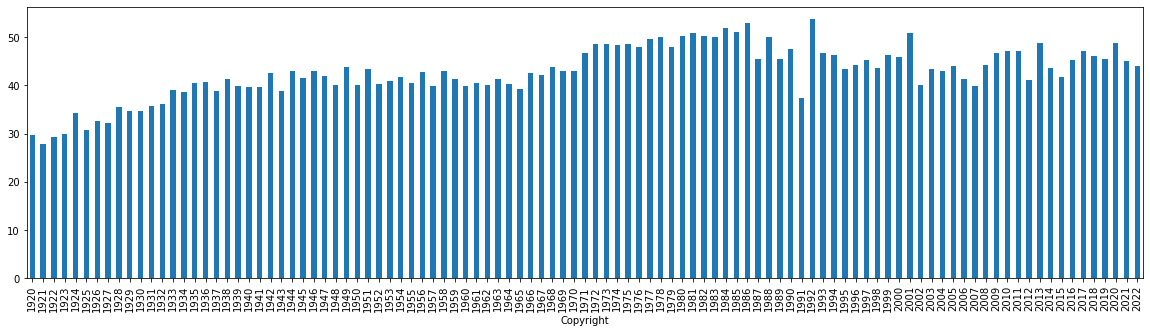

In [85]:
rezie.groupby("Copyright")["Věk"].mean().plot.bar(figsize=(20,5))

In [86]:
nejmladsi_reziseri = rezie.groupby("Copyright")["Věk"].min()

In [87]:
nejmladsi_reziseri[nejmladsi_reziseri >= 30]

Copyright
1934    32.0
1935    32.0
1942    31.0
1943    30.0
1945    32.0
1953    31.0
1955    31.0
1957    30.0
1960    30.0
1962    32.0
1968    30.0
1969    30.0
1971    32.0
1972    35.0
1973    34.0
1974    35.0
1975    30.0
1976    31.0
1977    32.0
1978    34.0
1980    30.0
1982    30.0
1983    30.0
1984    31.0
1985    31.0
1986    32.0
1987    30.0
1988    31.0
1990    31.0
2000    31.0
2001    32.0
2003    32.0
2020    30.0
2021    31.0
2022    42.0
Name: Věk, dtype: float64

In [88]:
rezie[(rezie["Věk"] < 30) & (rezie["Copyright"].isin(range(1960,1991)))]

,Film,Copyright,Režie,Typologie,Délka,Jméno,Rok narození,Věk
1507,Uprchlík (396433),1961,Herrmann Zschoche (129164),hraný,dlouhometrážní,Herrmann Zschoche (129164),1934.0,27.0
1571,Křik (396542),1963,Jaromil Jireš (5317),hraný,dlouhometrážní,Jaromil Jireš (5317),1935.0,28.0
1589,Máte doma lva? (396539),1963,Pavel Hobl (7876),hraný,dlouhometrážní,Pavel Hobl (7876),1935.0,28.0
1590,Za pět minut sedm (396581),1964,Pavel Hobl (7876),hraný,dlouhometrážní,Pavel Hobl (7876),1935.0,29.0
1653,Démanty noci (396605),1964,Jan Němec (3041),hraný,dlouhometrážní,Jan Němec (3041),1936.0,28.0
1671,Místenka bez návratu (396596),1964,Dušan Klein (2568),hraný,dlouhometrážní,Dušan Klein (2568),1939.0,25.0
1695,Místenka bez návratu (396596),1964,Miroslav Sobota (54046),hraný,dlouhometrážní,Miroslav Sobota (54046),1935.0,29.0
1703,Nikdo se nebude smát (396650),1965,Hynek Bočan (2947),hraný,dlouhometrážní,Hynek Bočan (2947),1938.0,27.0
1704,Soukromá vichřice (396727),1967,Hynek Bočan (2947),hraný,dlouhometrážní,Hynek Bočan (2947),1938.0,29.0
1821,Ostře sledované vlaky (396694),1966,Jiří Menzel (7887),hraný,dlouhometrážní,Jiří Menzel (7887),1938.0,28.0


## Mluveno

In [89]:
mluveno = df.explode("Mluveno")

In [90]:
mluveno["Mluveno"].drop_duplicates().to_list()

['bez dialogů',
 'česky',
 'německy',
 'francouzsky',
 'anglicky',
 'komentář',
 'zpíváno',
 'polsky',
 'slovensky',
 'rusínsky',
 'jidiš',
 'maďarsky',
 'srbochorvatsky',
 'latinsky',
 'inuitsky',
 'rusky',
 'italsky',
 'hebrejsky',
 'čínsky',
 'tibetsky',
 'korejsky',
 'vietnamsky',
 'španělsky',
 'nizozemsky',
 'indonésky',
 'romsky',
 'portugalsky',
 'japonsky',
 'mongolsky',
 'bulharsky',
 'khmersky',
 'švédsky',
 'turecky',
 'ukrajinsky',
 None,
 'lotyšsky',
 'makedonsky',
 'řecky',
 'staroslověnsky',
 'fiktivním jazykem bandungštinou',
 'znakovou řečí',
 'finsky',
 'islandsky',
 'ázerbájdžánsky',
 'fiktivním jazyjkem',
 'šarišsky',
 'dánsky',
 'arménsky',
 'slovinsky',
 'albánsky',
 'chorvatsky',
 'srbsky',
 'bosensky',
 'rumunsky',
 'moldavsky',
 'arabsky',
 'nepálsky',
 'fiktivním jazykem aporverštinou',
 'somálsky',
 'oromsky',
 'navažsky',
 'bengálsky',
 'slezsky',
 'svahilsky',
 'gruzínsky',
 'rwandsky',
 'sámsky',
 'umělým jazykem mezislovanštinou',
 'hindsky',
 'thajsky',

<AxesSubplot:xlabel='Copyright'>

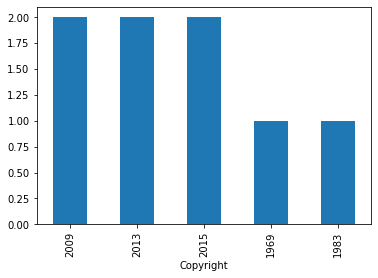

In [91]:
mluveno[mluveno["Mluveno"] == "romsky"].groupby("Copyright")["Film"].nunique().nlargest().plot.bar()

In [92]:
mluveno[mluveno["Mluveno"] == "romsky"][["Film","Copyright"]].sort_values(by="Copyright")

,Film,Copyright
2188,Skřivánci na niti (396810),1969
2832,Radikální řez (397408),1983
3328,Černobílá v barvě (53571),1999
3366,Zpráva o putování studentů Petra a Jakuba (16884),2000
3571,Iné svety (45546),2006
3697,El Paso (65979),2009
3700,Ulovit miliardáře (118291),2009
3787,Cigán (166202),2011
3876,Až do města Aš (190372),2012
3931,Všechny moje děti (400662),2013


<AxesSubplot:xlabel='Copyright'>

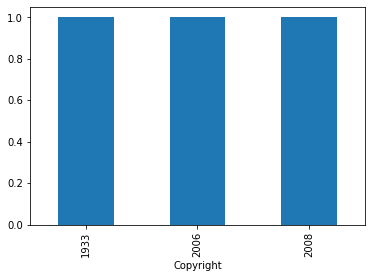

In [93]:
mluveno[mluveno["Mluveno"] == "rusínsky"].groupby("Copyright")["Film"].nunique().nlargest().plot.bar()

<AxesSubplot:xlabel='Copyright'>

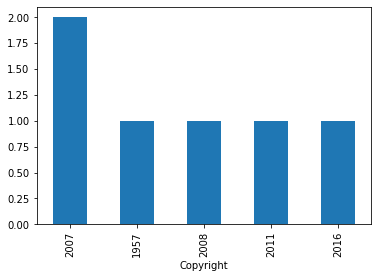

In [94]:
mluveno[mluveno["Mluveno"] == "vietnamsky"].groupby("Copyright")["Film"].nunique().nlargest().plot.bar()

## Rodiště

In [95]:
persony = pd.read_json(os.path.join("data", "persony.json"))

In [96]:
persony[persony["Osoba"] == "fyzická"].shape

(31064, 18)

In [97]:
persony[~persony["Město narození"].isnull()].shape

(9386, 18)

In [98]:
persony[(persony["Osoba"] == "fyzická") & (~persony["Město narození"].isnull())].shape

(9386, 18)

In [99]:
persony[persony["Město narození"] == "Praha"].shape

(3468, 18)

### Kontrola

In [100]:
persony[persony["Město narození"] == "Praha"].sample(10)

,Jméno,Id,Medailon,Osoba,Alternativní jména,Životopis,Datum narození,Místo narození,Datum úmrtí,Místo úmrtí,Zasloužilý umělec,Národní umělec,Město narození,Stát narození,Město úmrtí,Stát úmrtí,Rok narození,Rok úmrtí
2396,Gaia Vítková (1161),1161,střihačka,fyzická,None,"GAIA VÍTKOVÁ (nar. 10.7.1933, Praha), česká st...",-1151193600000,"Praha, Československo",1339027200000,"Praha, Česká republika",NaN,NaN,Praha,Československo,Česká republika,Česká republika,1933.0,2012.0
22387,Petr Nikolaev (540),540,"scenárista, režisér",fyzická,None,"PETR NIKOLAEV (nar. 11.5.1957, Praha) je synem...",-398995200000,"Praha, Československo",None,None,NaN,NaN,Praha,Československo,None,None,1957.0,NaN
9534,Jiří Winter Neprakta (13047),13047,"ilustrátor, karikaturista, humorista, kreslíř",fyzická,"Jiří Winter (rodné jméno), Neprakta (pseudonym)",None,-1435017600000,"Praha, Československo",1319932800000,"Praha, Česká republika",NaN,NaN,Praha,Československo,Česká republika,Česká republika,1924.0,2011.0
8306,Jaroslav Švalb (129256),129256,kameraman,fyzická,None,None,-1864080000000,"Praha, Rakousko-Uhersko",19??,None,NaN,NaN,Praha,Rakousko-Uhersko,None,None,1910.0,NaN
10081,Martin Stropnický (14029),14029,"herec, ministr kultury, politik, organizační p...",fyzická,None,None,-316742400000,"Praha, Československo",None,None,NaN,NaN,Praha,Československo,None,None,1959.0,NaN
17323,Emil Hakl (31949),31949,scenárista,fyzická,Jan Beneš (rodné jméno),None,-371520000000,"Praha, Československo",None,None,NaN,NaN,Praha,Československo,None,None,1958.0,NaN
22205,Ivan Richter (5282),5282,herec,fyzická,None,None,-507168000000,"Praha, Československo",974764800000,"Praha, Česká republika",NaN,NaN,Praha,Československo,Česká republika,Česká republika,1953.0,2000.0
18787,Daniela Muchová (34950),34950,"herečka, pedagožka",fyzická,"Daniela Píchová (rodné jméno), Daniela Muchová...",None,-728092800000,"Praha, Československo",1633305600000,"Čerčany u Prahy, Česká republika",NaN,NaN,Praha,Československo,Česká republika,Česká republika,1946.0,2021.0
7575,A. L. Salač (128600),128600,"výtvarník, ilustrátor, grafik, nakladatel",fyzická,Alois Ludvík Salač (celé jméno),None,-2194560000000,"Praha, Rakousko-Uhersko",-516153600000,"Lamperheim u Frankfurtu nad Mohanem, Západní N...",NaN,NaN,Praha,Rakousko-Uhersko,Západní Německo,Západní Německo,1900.0,1953.0
22291,Jiří Wimmer (5331),5331,"herec, komik",fyzická,None,None,-829353600000,"Praha, Československo",980380800000,"Praha, Česká republika",NaN,NaN,Praha,Československo,Česká republika,Česká republika,1943.0,2001.0


In [101]:
with open(os.path.join("data_fixes", "1000nejcastejsich.json"), encoding="utf-8") as nejcastejsi:
    nejcastejsi = json.loads(nejcastejsi.read())

In [102]:
persony[(persony["Jméno"].isin(nejcastejsi)) & (persony["Město narození"] == "Praha")][["Jméno","Medailon","Rok narození","Místo narození"]].sample(20)

,Jméno,Medailon,Rok narození,Místo narození
14689,František Říha (25336),"herec, kostymér, kabaretiér",1886.0,"Praha, Rakousko-Uhersko"
17564,Ivan Šimůnek (3259),asistent kamery,1945.0,"Praha, Československo"
21616,Josef Kemr (4897),"herec, hudebník",1922.0,"Praha, Československo"
7741,Antonín Šůra (128753),"herec, komik",1929.0,"Praha, Československo"
10332,Alena Procházková (14497),herečka,1945.0,"Praha, Československo"
12333,Václav Flegl (1969),zvukař,1977.0,"Praha, Československo"
23696,Jaroslava Kretschmerová (5834),"herečka, zpěvačka",1955.0,"Praha, Československo"
9801,Theodor Pištěk ml. (13227),"návrhář kostýmů, výtvarník, malíř, scénograf, ...",1932.0,"Praha, Československo"
20819,Jiří Matolín (444),"architekt, scénograf",1937.0,"Praha, Československo"
19700,Karel Lamač (37847),"scenárista, herec, režisér",1897.0,"Praha, Rakousko-Uhersko"


### Analýza

In [103]:
persony = pd.read_json(os.path.join("data", "persony.json"))

In [104]:
def rodiste(frame, persony, nelide, podil=float, n=int):
    pomery = {}
    for p in seznamy["profese"]:
        persony_pracovni = persony[persony["Osoba"] == "fyzická"]
        df_pracovni = frame[["Film","Copyright",p]].explode(p)
        df_pracovni = df_pracovni.merge(persony_pracovni[["Jméno","Osoba","Město narození","Stát narození"]], left_on = p, right_on = "Jméno")
        stats = []
        celkem = frame.explode(p)
        celkem = celkem[~(celkem[p].isnull())]
        celkem = celkem[~(celkem[p].isin(nelide))]
        celkem = len(celkem[p].to_list())
        # člověkofilmy celkem, vč. lidí bez id
        stats.append(celkem)
        df_pracovni = df_pracovni[(df_pracovni["Stát narození"].str.strip().isin(["Československo","Rakousko-Uhersko","Česká republika"])) & (~df_pracovni["Město narození"].isnull())]
        celkem_cr = df_pracovni.groupby("Film")[p].nunique().sum() 
        stats.append(celkem_cr) # člověkofilmy: narození v čr
        stats.append(celkem_cr / celkem) # poměr čr / všech vč. nevyplněných
        stats.append(df_pracovni[df_pracovni["Město narození"] == "Praha"].groupby("Film")[p].nunique().sum() / celkem)
        stats.append(df_pracovni[df_pracovni["Město narození"] == "Brno"].groupby("Film")[p].nunique().sum() / celkem)
        stats.append(df_pracovni[df_pracovni["Město narození"] == "Ostrava"].groupby("Film")[p].nunique().sum() / celkem)
        stats.append(df_pracovni[df_pracovni["Město narození"] == "Plzeň"].groupby("Film")[p].nunique().sum() / celkem)
        pomery[p] = stats
    pomery = pd.DataFrame.from_dict(pomery).transpose().rename(columns={0: "Celkem", 1: "S údajem o narození v ČR", 2: "%", 3: "Praha", 4: "Brno", 5: "Ostrava", 6: "Plzeň"})
    return pomery[(pomery["%"] >= podil) & (pomery["S údajem o narození v ČR"] >= n)].sort_values(by="Praha",ascending=False)

In [105]:
rodiste(df, persony, nelide, podil=0.5, n=100)

,Celkem,S údajem o narození v ČR,%,Praha,Brno,Ostrava,Plzeň
Architekt,3009.0,2231.0,0.741442,0.369558,0.037886,0.006314,0.026587
Choreografie,278.0,178.0,0.640288,0.363309,0.028777,0.010791,0.000000
Režie,4724.0,3834.0,0.811600,0.356901,0.025402,0.012913,0.021592
Komentář,652.0,536.0,0.822086,0.349693,0.038344,0.006135,0.018405
Technický scénář,1450.0,1240.0,0.855172,0.341379,0.035862,0.015862,0.026897
Původní filmový námět,3480.0,2627.0,0.754885,0.317816,0.026724,0.013793,0.020402
Kamera,5524.0,3620.0,0.655322,0.314989,0.018465,0.001086,0.004888
Scénář,6918.0,5149.0,0.744290,0.314542,0.027754,0.009396,0.017491
Mluví,3397.0,2351.0,0.692081,0.307330,0.022078,0.012953,0.016485
Střih,3926.0,2000.0,0.509424,0.266429,0.003057,0.001528,0.001019


In [106]:
rodiste(hcf[hcf["Copyright"] >= 1998], persony, nelide, podil=0, n=200)

C:\Users\micha\AppData\Local\Temp\ipykernel_5564\2918446222.py:17: RuntimeWarning: invalid value encountered in longlong_scalars
  stats.append(celkem_cr / celkem) # poměr čr / všech vč. nevyplněných
C:\Users\micha\AppData\Local\Temp\ipykernel_5564\2918446222.py:18: RuntimeWarning: invalid value encountered in longlong_scalars
  stats.append(df_pracovni[df_pracovni["Město narození"] == "Praha"].groupby("Film")[p].nunique().sum() / celkem)
C:\Users\micha\AppData\Local\Temp\ipykernel_5564\2918446222.py:19: RuntimeWarning: invalid value encountered in longlong_scalars
  stats.append(df_pracovni[df_pracovni["Město narození"] == "Brno"].groupby("Film")[p].nunique().sum() / celkem)
C:\Users\micha\AppData\Local\Temp\ipykernel_5564\2918446222.py:20: RuntimeWarning: invalid value encountered in longlong_scalars
  stats.append(df_pracovni[df_pracovni["Město narození"] == "Ostrava"].groupby("Film")[p].nunique().sum() / celkem)
C:\Users\micha\AppData\Local\Temp\ipykernel_5564\2918446222.py:21: Run

,Celkem,S údajem o narození v ČR,%,Praha,Brno,Ostrava,Plzeň
Režie,647.0,534.0,0.825348,0.318393,0.018547,0.010819,0.021638
Kamera,783.0,386.0,0.492976,0.261814,0.011494,0.000000,0.006386
Původní filmový námět,461.0,312.0,0.676790,0.249458,0.023861,0.010846,0.017354
Scénář,1273.0,709.0,0.556952,0.212883,0.016496,0.003142,0.013354
Dramaturg,1168.0,376.0,0.321918,0.203767,0.005993,0.005137,0.000000
Producent,1424.0,555.0,0.389747,0.194522,0.009831,0.002809,0.002809
Výkonná produkce,904.0,205.0,0.226770,0.172566,0.002212,0.000000,0.000000
Mluví,689.0,265.0,0.384615,0.165457,0.020319,0.013062,0.004354
Střih,706.0,256.0,0.362606,0.152975,0.008499,0.000000,0.001416
Masky,1348.0,202.0,0.149852,0.132047,0.000742,0.000000,0.000000


In [107]:
napokusy = rodiste(hcf[hcf["Copyright"] >= 1998], persony, nelide, podil=0, n=200)

C:\Users\micha\AppData\Local\Temp\ipykernel_5564\2918446222.py:17: RuntimeWarning: invalid value encountered in longlong_scalars
  stats.append(celkem_cr / celkem) # poměr čr / všech vč. nevyplněných
C:\Users\micha\AppData\Local\Temp\ipykernel_5564\2918446222.py:18: RuntimeWarning: invalid value encountered in longlong_scalars
  stats.append(df_pracovni[df_pracovni["Město narození"] == "Praha"].groupby("Film")[p].nunique().sum() / celkem)
C:\Users\micha\AppData\Local\Temp\ipykernel_5564\2918446222.py:19: RuntimeWarning: invalid value encountered in longlong_scalars
  stats.append(df_pracovni[df_pracovni["Město narození"] == "Brno"].groupby("Film")[p].nunique().sum() / celkem)
C:\Users\micha\AppData\Local\Temp\ipykernel_5564\2918446222.py:20: RuntimeWarning: invalid value encountered in longlong_scalars
  stats.append(df_pracovni[df_pracovni["Město narození"] == "Ostrava"].groupby("Film")[p].nunique().sum() / celkem)
C:\Users\micha\AppData\Local\Temp\ipykernel_5564\2918446222.py:21: Run

In [108]:
napokusy["Praha / Brno"] = napokusy["Praha"] / napokusy["Brno"]
napokusy.sort_values(by="Praha / Brno")

,Celkem,S údajem o narození v ČR,%,Praha,Brno,Ostrava,Plzeň,Praha / Brno
Spolupráce,3796.0,252.0,0.066386,0.037935,0.005532,0.000000,0.000527,6.857143
Mluví,689.0,265.0,0.384615,0.165457,0.020319,0.013062,0.004354,8.142857
Hrají,24753.0,7319.0,0.295681,0.116834,0.011877,0.010221,0.006221,9.836735
Původní filmový námět,461.0,312.0,0.676790,0.249458,0.023861,0.010846,0.017354,10.454545
Scénář,1273.0,709.0,0.556952,0.212883,0.016496,0.003142,0.013354,12.904762
Režie,647.0,534.0,0.825348,0.318393,0.018547,0.010819,0.021638,17.166667
"Hudba, text a zpěv písně",4825.0,1371.0,0.284145,0.132021,0.007668,0.007461,0.009534,17.216216
Střih,706.0,256.0,0.362606,0.152975,0.008499,0.000000,0.001416,18.000000
Producent,1424.0,555.0,0.389747,0.194522,0.009831,0.002809,0.002809,19.785714
Kamera,783.0,386.0,0.492976,0.261814,0.011494,0.000000,0.006386,22.777778


In [109]:
reziehcf = df[["Režie","Copyright","Film","Typologie","Délka"]].explode("Režie").explode("Typologie")
reziehcf = reziehcf[(reziehcf["Délka"] == "dlouhometrážní") & (reziehcf["Typologie"] == "hraný")]

In [110]:
reziehcf.merge(persony, left_on = "Režie", right_on = "Jméno")

,Režie,Copyright,Film,Typologie,Délka,Jméno,Id,Medailon,Osoba,Alternativní jména,Životopis,Datum narození,Místo narození,Datum úmrtí,Místo úmrtí,Zasloužilý umělec,Národní umělec,Město narození,Stát narození,Město úmrtí,Stát úmrtí,Rok narození,Rok úmrtí
0,Vladimír Majer (56169),1920,Magdalena (395221),hraný,dlouhometrážní,Vladimír Majer (56169),56169,"scenárista, herec, režisér",fyzická,Vladimír Rudolf Antonín Majer (rodné jméno),None,-2393884800000,"Plzeň, Rakousko-Uhersko",-383616000000,"Praha, Československo",NaN,NaN,Plzeň,Rakousko-Uhersko,Československo,Československo,1894.0,1957.0
1,Vladimír Majer (56169),1921,Manželé paní Mileny (395251),hraný,dlouhometrážní,Vladimír Majer (56169),56169,"scenárista, herec, režisér",fyzická,Vladimír Rudolf Antonín Majer (rodné jméno),None,-2393884800000,"Plzeň, Rakousko-Uhersko",-383616000000,"Praha, Československo",NaN,NaN,Plzeň,Rakousko-Uhersko,Československo,Československo,1894.0,1957.0
2,Vladimír Majer (56169),1934,V cizím revíru (395638),hraný,dlouhometrážní,Vladimír Majer (56169),56169,"scenárista, herec, režisér",fyzická,Vladimír Rudolf Antonín Majer (rodné jméno),None,-2393884800000,"Plzeň, Rakousko-Uhersko",-383616000000,"Praha, Československo",NaN,NaN,Plzeň,Rakousko-Uhersko,Československo,Československo,1894.0,1957.0
3,Vladimír Majer (56169),1934,Rozpustilá noc (395643),hraný,dlouhometrážní,Vladimír Majer (56169),56169,"scenárista, herec, režisér",fyzická,Vladimír Rudolf Antonín Majer (rodné jméno),None,-2393884800000,"Plzeň, Rakousko-Uhersko",-383616000000,"Praha, Československo",NaN,NaN,Plzeň,Rakousko-Uhersko,Československo,Československo,1894.0,1957.0
4,Rudolf Měšťák (123341),1920,Legionář (395220),hraný,dlouhometrážní,Rudolf Měšťák (123341),123341,"scenárista, režisér, vedoucí či majitel kina",fyzická,None,None,-2888179200000,"Praha, Rakousko-Uhersko",-745113600000,"Praha, Československo",NaN,NaN,Praha,Rakousko-Uhersko,Československo,Československo,1878.0,1946.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2984,Jan Filip (7226),2021,Vyšehrad: Seryjál (402090),hraný,dlouhometrážní,Jan Filip (7226),7226,kameraman,fyzická,"Jan JJ Filip, Jan J. Filip",None,404092800000,None,None,None,NaN,NaN,None,None,None,None,1982.0,NaN
2985,Jan Haluza (56934),2021,Deníček moderního fotra (402220),hraný,dlouhometrážní,Jan Haluza (56934),56934,"scenárista, producent, režisér",fyzická,"Jan Haluza, Last minute rescue",None,549072000000,"Olomouc, Československo",None,None,NaN,NaN,Olomouc,Československo,None,None,1987.0,NaN
2986,Michal Nohejl (1973),2021,Okupace (402157),hraný,dlouhometrážní,Michal Nohejl (1973),1973,"scenárista, režisér",fyzická,"duo Mods, The Mods",None,168134400000,None,None,None,NaN,NaN,None,None,None,None,1975.0,NaN
2987,Jan Foukal (19192),2021,Marťanské lodě (402153),hraný,dlouhometrážní,Jan Foukal (19192),19192,"scenárista, režisér",fyzická,"Jan Foukal (rodné jméno), Jan Fukino Foukal","JAN FOUKAL (nar. 11.8.1979, Praha) chodil do z...",303177600000,"Praha, Československo",None,None,NaN,NaN,Praha,Československo,None,None,1979.0,NaN


In [111]:
reziehcf = reziehcf.merge(persony, left_on = "Režie", right_on = "Jméno")

<AxesSubplot:xlabel='Copyright'>

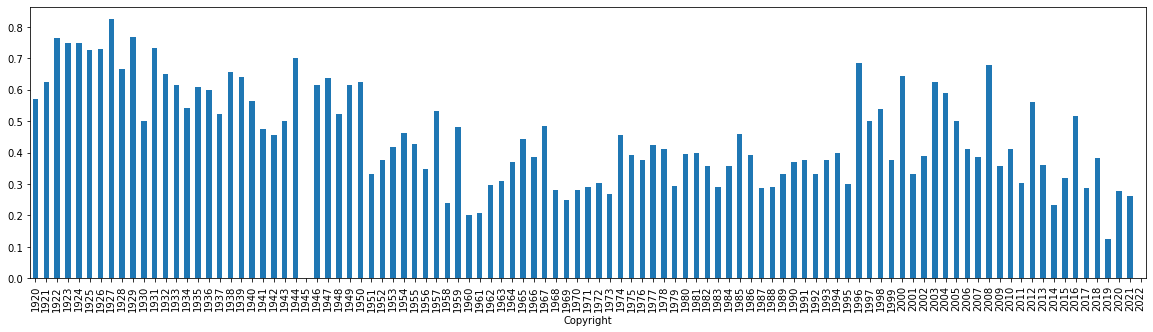

In [112]:
pd.Series(reziehcf[reziehcf["Město narození"] == "Praha"].groupby("Copyright")["Film"].nunique() / reziehcf[reziehcf["Stát narození"].str.strip().isin(["Československo","Rakousko-Uhersko","Česká republika"])].groupby("Copyright")["Film"].nunique()).plot.bar(figsize=(20,5))

<AxesSubplot:xlabel='Copyright'>

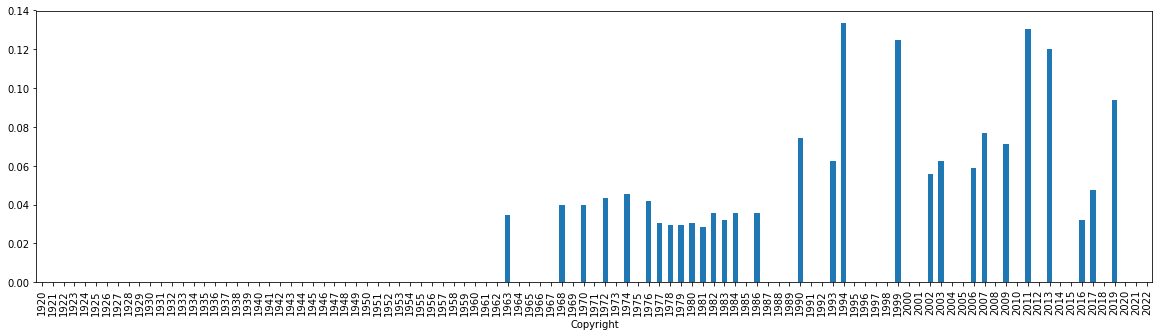

In [113]:
pd.Series(reziehcf[reziehcf["Město narození"] == "Bratislava"].groupby("Copyright")["Film"].nunique() / reziehcf[reziehcf["Stát narození"].str.strip().isin(["Československo","Rakousko-Uhersko","Česká republika"])].groupby("Copyright")["Film"].nunique()).plot.bar(figsize=(20,5))

## Slováci

In [114]:
profese = seznamy["profese"]

In [115]:
def plose_jednoduse(x):
    seznam = []
    for y in x:
        if y == None:
            pass
        if isinstance(y, str):
            if y not in seznam:
                seznam.append(y)
        if isinstance(y, list):
            for z in y:
                if z not in seznam:
                    seznam.append(z)
    return(seznam)

In [116]:
df["Lidé"] = df[profese].values.tolist()
df["Lidé"] = df["Lidé"].apply(lambda x: plose_jednoduse(x))

In [117]:
slovaci = df.explode("Lidé")

In [118]:
slovaci = slovaci.merge(persony, left_on="Lidé", right_on="Jméno")

<AxesSubplot:xlabel='Copyright'>

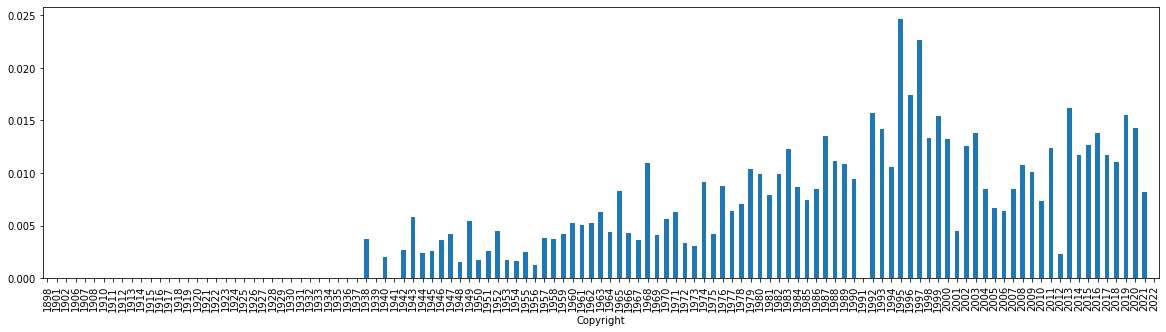

In [119]:
pd.Series(slovaci[slovaci["Město narození"] == "Bratislava"].groupby("Copyright")["Lidé"].nunique() / slovaci.groupby("Copyright")["Lidé"].nunique()).plot.bar(figsize=(20,5))

In [120]:
slovaci = slovaci.merge

## Kolik filmů spískal Státní fond kinematografie?

In [121]:
podpora = hcf.explode("S podporou")

In [122]:
podpora[podpora["Copyright"] >= 1998].groupby("S podporou")["Film"].nunique().nlargest(15)

S podporou
Státní fond České republiky pro podporu a rozvoj české kinematografie (90421)    192
Státní fond kinematografie (124966)                                              186
Audiovizuálny fond (123056)                                                       83
Ministerstvo kultúry Slovenskej republiky (113236)                                56
Media Programme EU (123258)                                                       48
Program podpory filmového průmyslu (123266)                                       42
Eurimages (107036)                                                                38
FILMOVÁ NADACE (103156)                                                           14
Polski Instytut Sztuki Filmowej (114937)                                          12
Magistrát hlavního města Prahy (99476)                                            10
Ministerstvo kultury České republiky (92178)                                      10
Jihomoravský filmový nadační fond (110676)            

<AxesSubplot:xlabel='Copyright'>

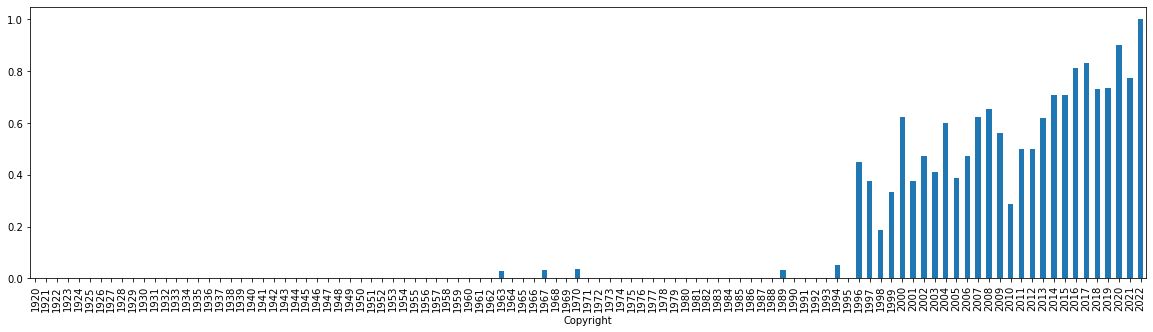

In [123]:
pd.Series(podpora[podpora["S podporou"].isin(["Státní fond kinematografie (124966)","Státní fond České republiky pro podporu a rozvoj české kinematografie (90421)"])].groupby("Copyright")["Film"].nunique() / podpora.groupby("Copyright")["Film"].nunique()).plot.bar(figsize=(20,5))

<AxesSubplot:xlabel='Copyright'>

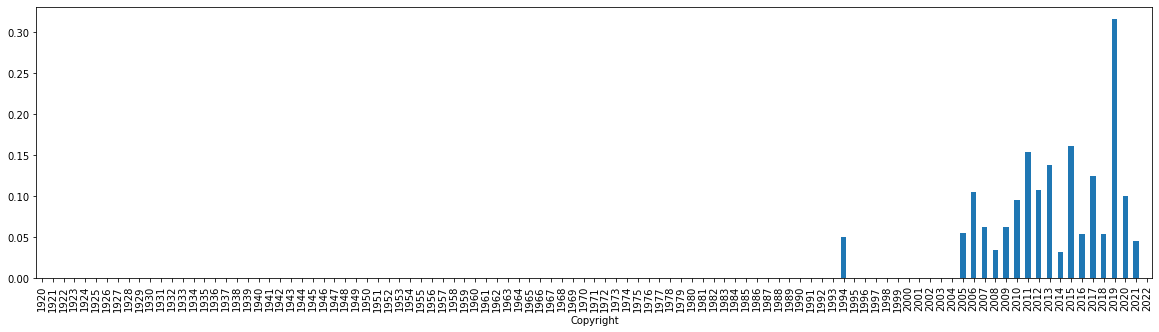

In [124]:
pd.Series(podpora[podpora["S podporou"] == "Media Programme EU (123258)"].groupby("Copyright")["Film"].nunique() / podpora.groupby("Copyright")["Film"].nunique()).plot.bar(figsize=(20,5))